In [1]:
import pandas as pd
import glob
import os
import sys
from IPython.display import HTML, display
from cellphonedb.utils import db_releases_utils

display(HTML(db_releases_utils.get_remote_database_versions_html()['db_releases_html_table']))

In [2]:
pd.set_option('display.max_columns', 100)
os.chdir('/home/datadisk/zlg/singlecell/EMT/2022cell')

In [3]:
cpdb_file_path = '/home/datadisk/zlg/singlecell/cellphonedb_database/v5.0.0/cellphonedb.zip'
meta_file_path = 'adata_normal_cancer.tsv'
counts_file_path = 'adata_normal_cancer_human.h5ad'
out_path = 'cell_communication/v5.0.0/method'

In [7]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

deconvoluted, means, pvalues, significant_means = cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellPhoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix.
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.
    #microenvs_file_path = microenvs_file_path,       # optional (default: None): defines cells per microenvironment.
    iterations = 1000,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.1,                                 # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 40,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = None                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )

Reading user files...
The following user files were loaded successfully:
adata_normal_cancer_human.h5ad
adata_normal_cancer.tsv
[ ][CORE][24/03/25-00:14:25][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:42 Threads:40 Precision:3
[ ][CORE][24/03/25-00:14:25][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][24/03/25-00:14:29][INFO] Running Real Analysis
[ ][CORE][24/03/25-00:14:29][INFO] Running Statistical Analysis


100%|███████████████████████████████████████████████████████████| 1000/1000 [15:42<00:00,  1.06it/s]


[ ][CORE][24/03/25-00:30:23][INFO] Building Pvalues result
[ ][CORE][24/03/25-00:30:23][INFO] Building results
Saved deconvoluted to cell_communication/v5.0.0/method/statistical_analysis_deconvoluted_03_24_2025_00:30:23.txt
Saved means to cell_communication/v5.0.0/method/statistical_analysis_means_03_24_2025_00:30:23.txt
Saved pvalues to cell_communication/v5.0.0/method/statistical_analysis_pvalues_03_24_2025_00:30:23.txt
Saved significant_means to cell_communication/v5.0.0/method/statistical_analysis_significant_means_03_24_2025_00:30:23.txt


In [9]:
import anndata
adata = anndata.read_h5ad(counts_file_path)
adata 

AnnData object with n_obs × n_vars = 58443 × 25954
    obs: 'TS_Present', 'RNA_Present', 'Lane', 'Tumor', 'SubTumor', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'leiden_sub', 'Cluster-Name'
    obsm: 'X_scVI', 'X_umap'

In [5]:
import ktplotspy as kpy
import matplotlib.pyplot as plt

In [11]:
#means = pd.read_csv(out_path+'/statistical_analysis_significant_means_03_24_2025_00:30:23.txt', sep="\t")
means = pd.read_csv(out_path+'/statistical_analysis_means_03_24_2025_00:30:23.txt', sep="\t")
pvalues = pd.read_csv(out_path+'/statistical_analysis_pvalues_03_24_2025_00:30:23.txt', sep="\t")
decon = pd.read_csv(out_path+'/statistical_analysis_deconvoluted_03_24_2025_00:30:23.txt', sep="\t")

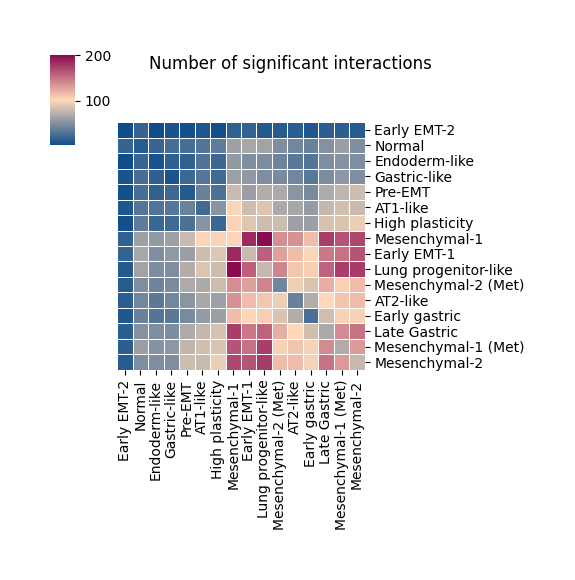

In [14]:
p=kpy.plot_cpdb_heatmap(
    #adata = adata,
    pvals = pvalues,
    figsize = (5,5),
    title = "Number of significant interactions",
    symmetrical = True,)

p.savefig('cpdb_heatmap.pdf')